In [4]:
import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import torch.nn as nn
# import torch
# from torch.utils.data import TensorDataset
# from torch.utils.data import DataLoader, Dataset
# import torch.optim as optim



In [5]:
from signal_process import oversampling
from signal_process import raised_cosine_filter
from signal_process import diff_encoding
from signal_process import prs_modulation
from signal_process import awgn_channel
from signal_process import signal_detection
from dataset import generate_dataset
from train import train 
from dnntest import test
from utils import indices_to_ternary



%load_ext autoreload
%autoreload 2



In [6]:
ndata = int(100000)
Nos = 10 #Number of oversamples
Rb = int(1e9) #Bit rate (Hz)
dec_num = 2

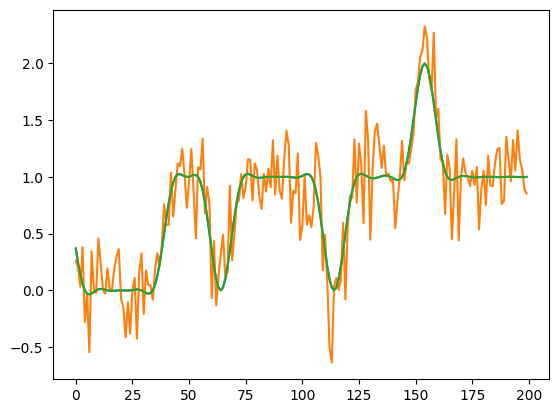

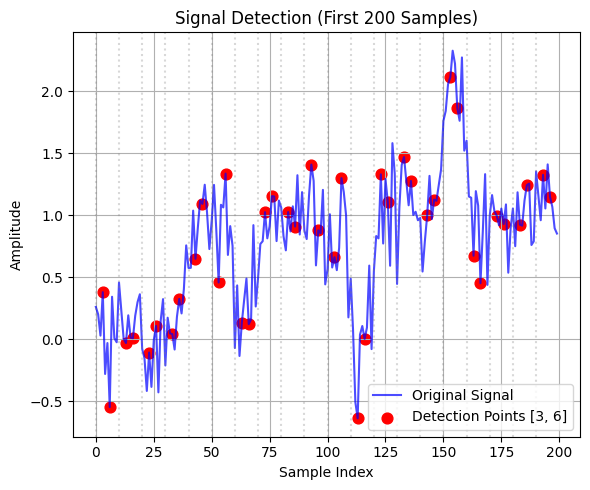

In [8]:
info_data = np.random.randint(2, size=ndata)# (ndata,)
# print("info data:",info_data)
diff_signal = diff_encoding(info_data)
prs_signal = prs_modulation(diff_signal,graph=False)
# print("diff signal:",diff_signal)
over_sampled = oversampling(prs_signal,graph=False) #(Nos * ndata,)
shaped_signal = raised_cosine_filter(over_sampled, Nos = Nos, Rb= Rb,graph=True) #(Nos * ndata,)
noisy_signal = awgn_channel(shaped_signal,EbN0_db= 10,graph=True)
dect_signal = signal_detection(noisy_signal, detection_points = [3,6],graph = True)
input_dataset, label_dataset = generate_dataset(prs_signal,dect_signal,samples_per_symbol=dec_num)
# train(input_dataset,label_dataset,lr = 0.001,num_epochs = 30,dropout_rate=0.2)


In [9]:
import matplotlib.pyplot as plt

def eyediagram(signal):
    # 裁剪到 10000 点并 reshape
    signal_reshape = signal[:10000].reshape(-1, 10)
    
    # x 轴：0-9 循环，y 轴：展平的数据
    x = np.tile(np.arange(10), len(signal_reshape))
    y = np.ravel(signal_reshape)
    
    # 绘制 2D 直方图
    plt.hist2d(x, y, bins=(10, 50), range=[[0, 10], [-0.25, 2.5]], cmap='viridis')
    plt.colorbar(label='Density')
    plt.title('Eye Diagram')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

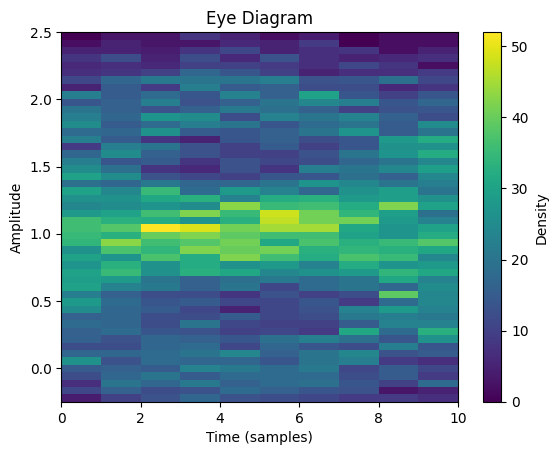

In [78]:
eyediagram(noisy_signal)

In [10]:
path = 'D:\\vscode\\work_ppace\\RNN_PRS\\models\\model_20250801_130040_lr0.001.pth'
print(input_dataset[:10])
print(label_dataset[:10])

pre, label = test(input_dataset,label_dataset,path)



[[ 0.          0.38069213 -0.54528409 -0.02889599]
 [-0.54528409 -0.02889599  0.0098062  -0.10561552]
 [ 0.0098062  -0.10561552  0.10861632  0.04317132]
 [ 0.10861632  0.04317132  0.32621625  0.64930554]
 [ 0.32621625  0.64930554  1.09225809  0.45871796]
 [ 1.09225809  0.45871796  1.33625265  0.13333387]
 [ 1.33625265  0.13333387  0.12326182  1.02519897]
 [ 0.12326182  1.02519897  1.154651    1.0263278 ]
 [ 1.154651    1.0263278   0.90953749  1.40924348]
 [ 0.90953749  1.40924348  0.87875582  0.66261085]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:

print(pre[:20])
# print(label[:20])
out = indices_to_ternary(pre)
print(out[:20])
middle_values = out[:, 1]
binary_values = middle_values % 2
print("middle_values",middle_values)
print("prs_signal   ",prs_signal)
data_to_save = np.column_stack((middle_values, prs_signal))

# 保存到txt文件（可自定义路径和格式）
np.savetxt('comparison_results.txt', 
           data_to_save, 
           fmt='%d',          # 整数格式
           delimiter='\t',    # 制表符分隔列
           header='Middle_Values\tPRS_Signal',  # 列标题
           comments='')       # 移除默认的注释符'#'

print("数据已保存到 comparison_results.txt")



[ 0  0  0  1  2  6  5  2  7  7  6  5  2  7  8  9 12  2  7  7]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]
 [1 1 2]
 [1 2 1]
 [2 1 1]
 [0 1 1]
 [1 1 1]
 [1 1 1]]
middle_values [0 0 0 ... 1 2 1]
prs_signal    [0 0 0 ... 1 2 1]
数据已保存到 comparison_results.txt


In [86]:
# 比较解码后的 middle_values 和原始 prs_middle
errors = np.sum(middle_values != prs_signal)
total_bits = len(middle_values)
ber = errors / total_bits
print(ber)

0.005879941200587994


In [87]:
def generate_test_dataset(EbN0_db):
    info_data = np.random.randint(2, size=1000000)# (ndata,)
    # print("info data:",info_data)
    diff_signal = diff_encoding(info_data)
    prs_signal = prs_modulation(diff_signal,graph=False)
    # print("diff signal:",diff_signal)
    over_sampled = oversampling(prs_signal,graph=False) #(Nos * ndata,)
    shaped_signal = raised_cosine_filter(over_sampled, Nos = Nos, Rb= Rb,graph=False) #(Nos * ndata,)
    noisy_signal = awgn_channel(shaped_signal,EbN0_db = EbN0_db,graph=False)
    dect_signal = signal_detection(noisy_signal, detection_points = [3,6],graph = False)
    input_dataset, label_dataset = generate_dataset(prs_signal,dect_signal,samples_per_symbol=dec_num)
    return input_dataset, label_dataset, info_data


ber_list = []

for EbN0_db in range(4,17):
    test_input, test_label, info_test = generate_test_dataset(EbN0_db)
    pre, label = test(test_input,test_label,path)
    out = indices_to_ternary(pre)
    middle_values = out[:, 1]
    binary_values = middle_values % 2
    total_bits = len(binary_values)
    errors = np.sum(binary_values[:total_bits - 1] != info_test)
    ber = errors / (total_bits - 1)
    print(ber)
    ber_list.append(ber)


0.120259
0.089072
0.0616
0.04041
0.024486
0.013051
0.006254
0.002494
0.000786
0.000219
2.6e-05
7e-06
1e-06


(1e-05, 1)

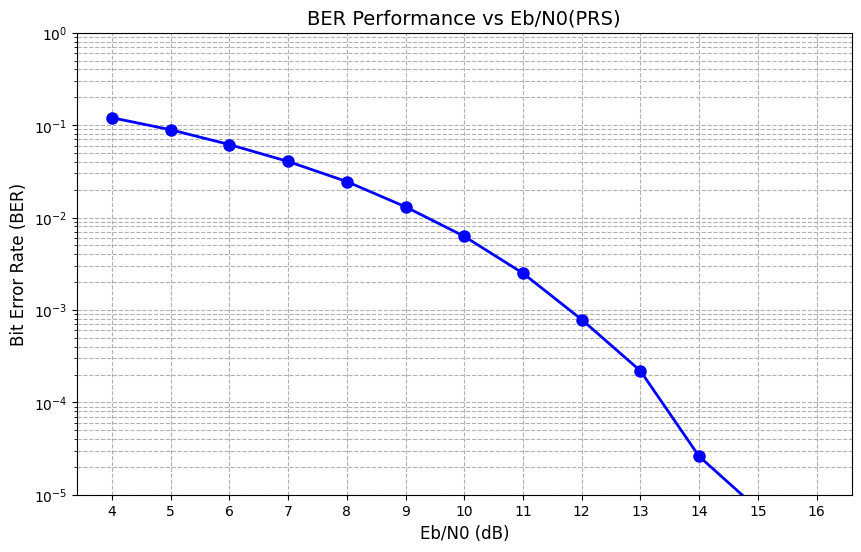

In [88]:
ebn0_range = range(4, 17)
# 绘制BER曲线
plt.figure(figsize=(10, 6))
plt.semilogy(ebn0_range, ber_list, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Eb/N0 (dB)', fontsize=12)
plt.ylabel('Bit Error Rate (BER)', fontsize=12)
plt.title('BER Performance vs Eb/N0(PRS)', fontsize=14)
plt.grid(True, which="both", ls="--")
plt.xticks(ebn0_range)
plt.ylim(1e-5, 1)  # 根据实际BER调整范围